# Homework 3: Tables and Charts
Reading: Textbook chapters [5](http://www.inferentialthinking.com/chapters/05/tables.html) and [6](https://www.inferentialthinking.com/chapters/06/visualization.html). 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw03.ok')
#_ = ok.auth(inline=True)

Assignment: Homework 3: Tables and Charts
OK, version v1.13.9



**Important**: The `ok` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach).

Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission.

In [2]:
#_ = ok.submit()

## 1. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below we've loaded data on unemployment in the United States.  There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 1.** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.

In [3]:
unemployment = Table().read_table('unemployment.csv')
unemployment

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832
1995-04-01,9.0314,10.1071
1995-07-01,8.9802,10.1084
1995-10-01,8.9932,10.1046
1996-01-01,9.0002,10.0531
1996-04-01,8.9038,9.9782


In [4]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Sort the data in decreasing order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in decreasing order by NEI-PTER instead.

In [5]:
by_nei = unemployment.sort('NEI', descending = True)
by_nei_pter = unemployment.sort('NEI-PTER', descending = True)
by_nei

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


In [6]:
by_nei_pter

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2009-07-01,10.8089,12.7404
2010-01-01,10.9054,12.7311
2010-04-01,10.6597,12.5664
2009-04-01,10.7082,12.5497
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


In [7]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Use `take` to make a table containing the data for the 8 quarters when NEI was greatest.  Call that table `greatest_nei`.

In [8]:
greatest_nei = by_nei.take(np.arange(0,8))
greatest_nei

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017


In [9]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

In [10]:
pter =unemployment.column('NEI-PTER')- unemployment.column('NEI')
pter

array([1.0746, 1.1644, 1.1555, 1.129 , 1.2139, 1.0757, 1.1282, 1.1114,
       1.0529, 1.0744, 1.1004, 1.0747, 1.0705, 1.0455, 1.008 , 0.9734,
       0.9753, 0.8931, 0.9451, 0.8367, 0.8208, 0.8105, 0.8248, 0.7578,
       0.7251, 0.7445, 0.7543, 0.7423, 0.7399, 0.7687, 0.8418, 0.9923,
       0.9181, 0.9629, 0.9703, 0.9575, 1.0333, 1.0781, 1.0675, 1.0354,
       1.0601, 1.01  , 1.0042, 1.0368, 0.9704, 0.923 , 0.9759, 0.93  ,
       0.889 , 0.821 , 0.9409, 0.955 , 0.898 , 0.8948, 0.9523, 0.9579,
       1.0149, 1.0762, 1.2873, 1.4335, 1.7446, 1.8415, 1.9315, 1.8859,
       1.8257, 1.9067, 1.8376, 1.8473, 1.7993, 1.8061, 1.7651, 1.7927,
       1.7286, 1.6387, 1.6808, 1.6805, 1.6629, 1.6253, 1.6477, 1.6298,
       1.4796, 1.5131, 1.4866, 1.4345, 1.3675, 1.3097, 1.2319, 1.1735,
       1.1844, 1.1746])

In [11]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in decreasing order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.

In [12]:
by_pter = (unemployment.with_column('PTER', pter)).sort('PTER', descending = True)
by_pter

Date,NEI,NEI-PTER,PTER
2009-07-01,10.8089,12.7404,1.9315
2010-04-01,10.6597,12.5664,1.9067
2009-10-01,10.9698,12.8557,1.8859
2010-10-01,10.5856,12.4329,1.8473
2009-04-01,10.7082,12.5497,1.8415
2010-07-01,10.5521,12.3897,1.8376
2010-01-01,10.9054,12.7311,1.8257
2011-04-01,10.4409,12.247,1.8061
2011-01-01,10.5024,12.3017,1.7993
2011-10-01,10.3287,12.1214,1.7927


In [13]:
_ = ok.grade('q1_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Does it seem true that the PTER rate was very high during the Great Recession, compared to other periods in the dataset? Justify your answer by referring to specific values in the table or by generating a chart.


Answer: According to the chart, compared to the other times, there is a big spike in the beginning of the 2009, which is the time that the "Great Recession" is happening. Thus, we can say that there is a relationship between the Great Recession and the very high PTER rate. 

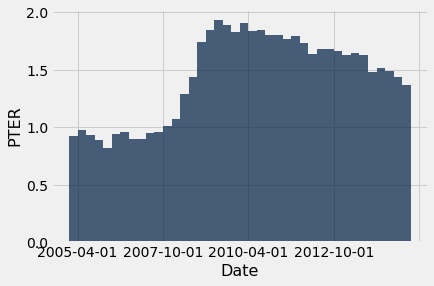

In [14]:
by_pter.sort('Date', descending = False).take(np.arange(45,85)).bar('Date', 'PTER')

## 2. Birth Rates


The following table gives census-based population estimates for each state on July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. *For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.*

In [15]:
# Don't change this cell; just run it.
# From http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv
# See http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf
#     for column descriptions. (As of Feb 2017, no descriptions were posted for 2010-2016.)
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled(2, '2015').relabeled(3, '2016')
pop = pop.relabeled(4, 'BIRTHS').relabeled(5, 'DEATHS')
pop = pop.relabeled(6, 'MIGRATION').relabeled(7, 'OTHER')
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"4,853,875","4,863,300","58,556","52,405","3,874",-600
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461"
3,Arkansas,"2,977,853","2,988,248","37,936","30,581","3,530",-490
4,California,"38,993,940","39,250,017","502,848","273,850","33,530","-6,451"


**Question 1.** Assign `us_death_rate` to the total US annual death rate during this time interval. The annual death rate for a year-long period is the number of deaths in that period as a proportion of the population at the start of the period.

In [16]:
us_death_rate = sum(pop.column('DEATHS')) / sum(pop.column('2015'))
us_death_rate

0.008552340595679192

In [17]:
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Assign `fastest_growth` to an array of the names of the five states with the fastest population growth rates in *descending order of growth rate*.

In [ ]:
fastest_growth = pop.with_column('Population Growth', ((pop.column('2016') / pop.column('2015')))).sort('Population Growth',descending = True).take(np.arange(0,5)).column('NAME')
fastest_growth

In [ ]:
_ = ok.grade('q2_2')

**Question 3.** Assign `movers` to the number of states for which the absolute annual rate of migration was higher than 0.5%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state.

In [20]:
movers = Table().with_column('Absolute Migration Rate', abs(pop.column('MIGRATION') / pop.column('2015'))).where('Absolute Migration Rate', are.above(0.005)).num_rows 
movers                   

20

In [ ]:
_ = ok.grade('q2_3')

**Question 4.** Assign `west_births` to the total number of births that occurred in region 4 (the Western US).

In [ ]:
west_births = sum((pop.where('REGION', are.equal_to('4'))).column('BIRTHS'))
west_births

In [ ]:
_ = ok.grade('q2_4')

**Question 5.** Assign `less_than_west_births` to the number of states that had a total population in 2016 that was smaller than the *number of babies born in region 4 (the Western US)* during this time interval.

In [ ]:
less_than_west_births = len((pop.where('2016', are.below(west_births))).column('BIRTHS'))
less_than_west_births

In [ ]:
_ = ok.grade('q2_5')

**Question 6.** Was there an association between birth rate and death rate during this time interval? Use the code cell below to support your conclusion with a chart. If an association exists, what might explain it?

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

There is a connection between the birth rate and the death rate,  which is shown by the downward trend in the scatterplot below. One reason for this negative association could be the distribution of ages across states. States with a higher population of older people should have a higher death rate, but a lower birth rate. States with a higher population of younger people should have a higher birth rate, but a lower death rate.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

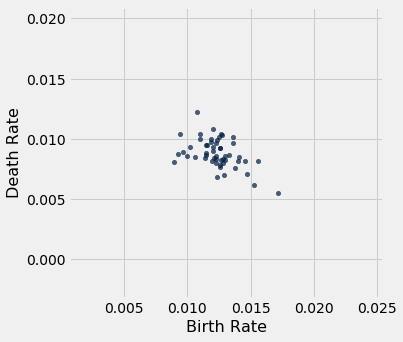

In [21]:
# Generate a chart here to support your conclusion
pop.with_columns('Birth Rate', pop.column('BIRTHS')/pop.column('2015'), 'Death Rate', pop.column('DEATHS')/pop.column('2015')).scatter('Birth Rate','Death Rate')

## 3. Consumer Financial Protection Bureau Complaints


The Consumer Financial Protection Bureau has collected and published consumer complaints against financial companies since 2011.  The data are available [here](https://dev.socrata.com/foundry/data.consumerfinance.gov/jhzv-w97w) (or at this [direct link](https://data.consumerfinance.gov/resource/jhzv-w97w.csv).  For this exercise, to make your code run faster, we've selected only the data from May 2016.

Run the next cell to load the data.  Each row represents one consumer's complaint.

In [22]:
# Just run this cell.
complaints = Table.read_table("complaints.csv")
complaints

company,company_public_response,company_response,complaint_id,complaint_what_happened,consumer_consent_provided,consumer_disputed,date_received,date_sent_to_company,issue,product,state,sub_issue,sub_product,submitted_via,tags,timely,zip_code
"TransUnion Intermediate Holdings, Inc.",Company has responded to the consumer and the CFPB and c ...,Closed with explanation,1920073,(None),(None),Yes,2016-05-11T15:39:07.000,2016-05-11T15:39:07.000,Credit reporting company's investigation,Credit reporting,VT,Inadequate help over the phone,(None),Phone,(None),Yes,05035
"TransUnion Intermediate Holdings, Inc.",Company has responded to the consumer and the CFPB and c ...,Closed with explanation,1914777,(None),Consent not provided,No,2016-05-08T00:53:47.000,2016-05-12T18:40:34.000,Incorrect information on credit report,Credit reporting,MO,Information is not mine,(None),Web,(None),Yes,63020
Bank of America,Company has responded to the consumer and the CFPB and c ...,Closed with explanation,1907306,I became aware of several charges on a Bank of America c ...,Consent provided,No,2016-05-03T16:49:33.000,2016-05-03T16:49:34.000,Other,Credit card,VA,(None),(None),Web,(None),Yes,239XX
Finance of America Reverse LLC,Company believes it acted appropriately as authorized by ...,Closed with explanation,1919055,I applied for a reverse mortgage and everthing was going ...,Consent provided,No,2016-05-10T20:13:22.000,2016-05-10T20:13:23.000,"Application, originator, mortgage broker",Mortgage,TX,(None),Reverse mortgage,Web,Older American,Yes,774XX
"Acceptance Solutions Group, INC",Company believes it acted appropriately as authorized by ...,Closed with explanation,1908628,Keeps calling numbers that are not mine. And talking to ...,Consent provided,No,2016-05-03T21:05:42.000,2016-05-06T13:42:45.000,Improper contact or sharing of info,Debt collection,OH,Talked to a third party about my debt,Payday loan,Web,(None),Yes,430XX
Equifax,(None),Closed with explanation,1909176,(None),(None),No,2016-05-04T20:08:06.000,2016-05-09T15:11:00.000,Incorrect information on credit report,Credit reporting,NC,Information is not mine,(None),Postal mail,(None),Yes,28052
"TransUnion Intermediate Holdings, Inc.",Company has responded to the consumer and the CFPB and c ...,Closed with explanation,1914477,When I enter my personal information to receive my credi ...,Consent provided,No,2016-05-06T23:09:50.000,2016-05-08T22:40:19.000,Unable to get credit report/credit score,Credit reporting,OH,Problem getting my free annual report,(None),Web,(None),Yes,450XX
Encore Capital Group,(None),Closed with non-monetary relief,1919937,(None),Consent not provided,(None),2016-05-11T18:58:25.000,2016-05-11T21:53:54.000,Cont'd attempts collect debt not owed,Debt collection,CT,Debt is not mine,Credit card,Web,Older American,Yes,06801
Nationstar Mortgage,(None),Closed with explanation,1920517,I am livid with Nation Star for refusing to work with me ...,Consent provided,(None),2016-05-11T20:38:09.000,2016-05-11T20:38:09.000,"Application, originator, mortgage broker",Mortgage,IL,(None),Conventional adjustable mortgage (ARM),Web,(None),Yes,606XX
"Convergent Resources, Inc.",(None),Closed with explanation,1920464,(None),Consent not provided,No,2016-05-11T12:16:31.000,2016-05-11T12:16:32.000,Cont'd attempts collect debt not owed,Debt collection,TX,Debt is not mine,"Other (i.e. phone, health club, etc.)",Web,(None),Yes,78109


**Question 1.** Financial companies offer a variety of products.  How many complaints were made against each kind of product?  Make a table called `complaints_per_product` with one row per product category and 2 columns: "product" (the name of the product) and "number of complaints" (the number of complaints made against that kind of product).

In [23]:
complaints_per_product = complaints.group('product').relabel('count', 'number of complaints')
complaints_per_product

product,number of complaints
Bank account or service,1687
Consumer Loan,775
Credit card,1566
Credit reporting,3820
Debt collection,3022
Money transfers,142
Mortgage,3468
Other financial service,16
Payday loan,119
Prepaid card,110


In [ ]:
_ = ok.grade('q3_1')

**Question 2.** Make a bar chart showing how many complaints were made about each product category. Sort the bars from shortest to longest.

In [ ]:
complaints_per_product.sort('number of complaints').barh('product', 'number of complaints')

**Question 3.** Make a table of the number of complaints made against each *company*.  Call it `complaints_per_company`.  It should have one row per company and 2 columns: "company" (the name of the company) and "number of complaints" (the number of complaints made against that company).

In [ ]:
complaints_per_company = complaints.group('company').relabel('count', 'number of complaints')
complaints_per_company

In [ ]:
_ = ok.grade('q3_3')

**Question 4.** It wouldn't be a good idea to make a bar chart of that data.  (Don't try it!)  Why not?

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

There are too many rows, each of which would be a separate bar in a bar chart. It would be too difficult to process and make sense of a bar chart with over 1100 rows.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

**Question 5.** Make a bar chart of just the 5 companies with the most complaints. 

In [24]:
complaints_per_company.sort('number of complaints', descending = True).take(np.arange(0,5)).barh('company', 'number of complaints')

NameError: name 'complaints_per_company' is not defined

**Question 6.** Make a bar chart like the one above, with one difference: The size of each company's bar should be the *proportion* (among *all complaints* made against any company in `complaints`) that were made against that company.

**Note:** Graphs aren't very useful without accurate labels.  Make sure that the text on the horizontal axis of the graph makes sense.

In [ ]:
complaints_per_company.with_column('proportion of total complaints', (complaints_per_company.column('number of complaints')/sum(complaints_per_company.column('number of complaints')))).sort('proportion of total complaints', descending = True).take(np.arange(0,10)).barh('company', 'proportion of total complaints')

## 4. Marginal Histograms


Consider the following scatter plot: ![](scatter.png)

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

**Question 1:** Match each of the following lines of code to the histograms they produce. Explain your reasoning.

**Line 1:** `t.hist('x')`

**Line 2:** `t.hist('y')`

**Histogram A:** ![](var1.png)
**Histogram B:** ![](var2.png)

**Histogram for Line 1:**
<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">
Histogram A
<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

**Explanation:**
<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">
The "y"s are all scatters between [-1.5,-0.5] and [0.5,1.5] and no points in the [-0.5, 0.5], which matches the Histogram A.
<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

**Histogram for Line 2:**
<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">
Histogram B
<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

**Explanation:**
<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">
There are points scattering all along [-2,3], with a lot of overlapping in the range [-1,0], thus should be a spike in [-1,0], which matches with Histogram B. 
<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">